In [58]:
#prepare dataframe of quantitative inputs to generate train_test split

In [59]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [60]:
df=pd.read_csv('quants_narrow_outlier_false.csv')
df = df.iloc[:,1:]
df.columns

Index(['duration', 'budget', 'gross', 'year', 'month', 'roi_outlier_ind'], dtype='object')

In [61]:
columns_to_keep=['duration','budget','gross','month']

In [62]:
df1 = df[columns_to_keep]

In [63]:
df1.head()

,duration,budget,gross,month
0,78,2500,15610,3
1,100,2500,51,10
2,80,5000,18389,4
3,75,5000,16743,8
4,79,7000,74,10


In [64]:
genre = pd.read_csv('genre_ary.csv')
genre = genre.iloc[:,1:]
genre
lang = pd.read_csv('language_ary.csv')
lang = lang.iloc[:,1:]

In [65]:
df_X = df1.join(genre).join(lang) #merges based on index location, which is desired

<AxesSubplot:>

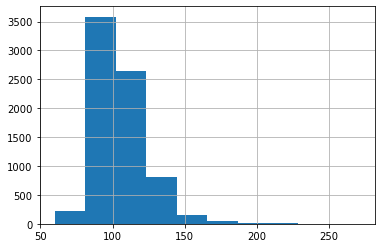

In [66]:
df_X=pd.read_csv('quants_narrow_outlier_false.csv')
df_X=df_X.drop(['Unnamed: 0','year'],axis=1)
df_X['duration'].hist()

<AxesSubplot:>

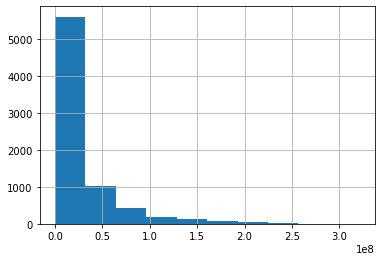

In [67]:
df_X['budget'].hist()

<AxesSubplot:>

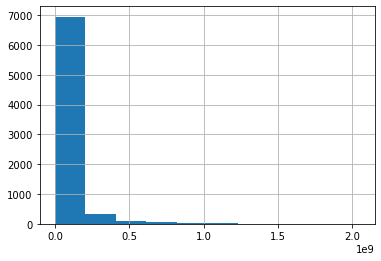

In [68]:
df_X['gross'].hist()

<AxesSubplot:>

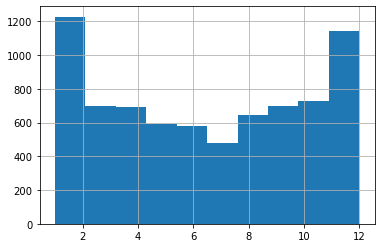

In [69]:
df_X['month'].hist()

In [70]:
df_X = df_X.join(genre)

In [71]:
df_X=df_X.join(lang)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'roi_outlier_ind'}>,
        <AxesSubplot:title={'center':'action'}>],
       [<AxesSubplot:title={'center':'adventure'}>,
        <AxesSubplot:title={'center':'animation'}>,
        <AxesSubplot:title={'center':'biography'}>,
        <AxesSubplot:title={'center':'comedy'}>,
        <AxesSubplot:title={'center':'crime'}>,
        <AxesSubplot:title={'center':'drama'}>],
       [<AxesSubplot:title={'center':'family'}>,
        <AxesSubplot:title={'center':'fantasy'}>,
        <AxesSubplot:title={'center':'history'}>,
        <AxesSubplot:title={'center':'horror'}>,
        <AxesSubplot:title={'center':'music'}>,
        <AxesSubplot:title={'center':'musical'}>],
       [<AxesSubplot:title={'center':'mystery'}>,
        <AxesSubplot:title={'center':'romance'}

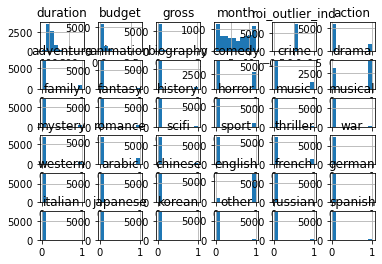

In [72]:
df_X.hist()

In [84]:
df_X.to_csv('wide_quants1.csv')

In [74]:
# s=pd.qcut(df_X["gross"], q=3, labels=['1','2','3'])

In [75]:
y=df_X["gross"]

In [76]:
# df_X['gross']=s
# df_X.head()

In [77]:
df_X = df_X.drop(['gross','roi_outlier_ind'], axis=1)

In [78]:
df_X.columns

Index(['duration', 'budget', 'month', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'musical', 'mystery', 'romance', 'scifi', 'sport',
       'thriller', 'war', 'western', 'arabic', 'chinese', 'english', 'french',
       'german', 'italian', 'japanese', 'korean', 'other', 'russian',
       'spanish'],
      dtype='object')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, random_state=42)

In [80]:
model = RandomForestRegressor()

In [81]:
model = model.fit(X_train, y_train)

In [82]:
y_pred=model.predict(X_test)

In [83]:
model.score(df_X, y)

0.8912712283619915

In [55]:
import joblib

In [56]:
joblib.dump(model, "model.joblib")

['model.joblib']